In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [24]:
dataset=pd.read_csv('Fertilizer-augmented_data.csv')

In [25]:
dataset.head(10)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,25,51,37,Sandy,Maize,36,0,0,Urea
1,27,53,39,Sandy,Maize,38,1,1,Urea
2,28,51,44,Loamy,Sugarcane,11,0,35,DAP
3,30,53,46,Loamy,Sugarcane,13,1,37,DAP
4,33,64,61,Black,Cotton,6,8,29,14-35-14
5,35,66,63,Black,Cotton,8,10,31,14-35-14
6,31,61,33,Red,Tobacco,21,0,19,28-28
7,33,63,35,Red,Tobacco,23,1,21,28-28
8,27,53,45,Clayey,Paddy,34,0,0,Urea
9,29,55,47,Clayey,Paddy,36,1,1,Urea


In [26]:
dataset['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '170707', '20-20', '10-26-26'],
      dtype=object)

In [27]:
X=dataset.drop('Fertilizer Name',axis=1)

In [28]:
X

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,25,51,37,Sandy,Maize,36,0,0
1,27,53,39,Sandy,Maize,38,1,1
2,28,51,44,Loamy,Sugarcane,11,0,35
3,30,53,46,Loamy,Sugarcane,13,1,37
4,33,64,61,Black,Cotton,6,8,29
...,...,...,...,...,...,...,...,...
609,31,61,39,Sandy,Millets,11,1,15
610,29,59,39,Sandy,Millets,40,0,0
611,31,61,41,Sandy,Millets,42,1,1
612,35,59,42,Sandy,Millets,14,0,40


In [29]:
X["Soil Type"].unique

<bound method Series.unique of 0      Sandy
1      Sandy
2      Loamy
3      Loamy
4      Black
       ...  
609    Sandy
610    Sandy
611    Sandy
612    Sandy
613    Sandy
Name: Soil Type, Length: 614, dtype: object>

In [30]:
Y=dataset['Fertilizer Name']

In [31]:
Y

0          Urea
1          Urea
2           DAP
3           DAP
4      14-35-14
         ...   
609       20-20
610        Urea
611        Urea
612         DAP
613         DAP
Name: Fertilizer Name, Length: 614, dtype: object

In [32]:
label_encoder = LabelEncoder()
dataset['Soil Type Encoded'] = label_encoder.fit_transform(dataset['Soil Type'])
dataset['Crop Type Encoded'] = label_encoder.fit_transform(dataset['Crop Type'])
dataset['Fertilizer Name Encoded'] = label_encoder.fit_transform(dataset['Fertilizer Name'])

In [33]:
dataset

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Soil Type Encoded,Crop Type Encoded,Fertilizer Name Encoded
0,25,51,37,Sandy,Maize,36,0,0,Urea,4,3,6
1,27,53,39,Sandy,Maize,38,1,1,Urea,4,3,6
2,28,51,44,Loamy,Sugarcane,11,0,35,DAP,2,8,5
3,30,53,46,Loamy,Sugarcane,13,1,37,DAP,2,8,5
4,33,64,61,Black,Cotton,6,8,29,14-35-14,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,31,61,39,Sandy,Millets,11,1,15,20-20,4,4,3
610,29,59,39,Sandy,Millets,40,0,0,Urea,4,4,6
611,31,61,41,Sandy,Millets,42,1,1,Urea,4,4,6
612,35,59,42,Sandy,Millets,14,0,40,DAP,4,4,5


In [34]:
X = dataset[['Temparature','Humidity ','Moisture','Soil Type Encoded','Crop Type Encoded','Nitrogen','Potassium','Phosphorous']]
Y = dataset['Fertilizer Name Encoded']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [36]:
X_poly = poly_features.fit_transform(X)

In [37]:
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = model.predict(X_test)

In [38]:
Y_pred

array([ 0.02496027,  4.13297927,  6.24929309,  3.18246293,  2.75111745,
        1.8539954 ,  5.77237701,  4.01707095,  2.06405273,  1.12917985,
        1.4753417 ,  1.27588532,  1.24243848, -0.73279475, -0.76624159,
        5.81628335,  4.02798513,  4.74764934,  5.5224044 , -0.566065  ,
        1.85814874,  2.03060589,  6.03477701,  5.77237701, -0.66665867,
        2.97223288,  6.20673869,  3.9945383 ,  3.31806258,  6.13298132,
        1.71336092,  4.68498436,  4.12844151,  4.93792101,  4.16187418,
        2.05700776,  5.87642556,  2.84952566,  5.74591777,  2.43066797,
        4.74509369,  4.95899977, -0.59951184,  4.73309007,  4.71972573,
        4.83193964,  0.63844197,  4.81484149,  0.21538565,  4.58490186,
        5.79752686,  1.45386421,  3.9802533 ,  3.86515972,  6.03477701,
        4.81484149,  1.16262669,  4.66702802,  1.58000521,  4.66665328,
        3.19949004,  5.69997158,  1.71336092,  5.87642556,  2.05700776,
        3.98479106,  4.5202681 ,  1.16262669,  6.22482806,  5.76

In [39]:
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.509160754076999


In [40]:
import pickle
with open('linear_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [41]:
with open('linear_regression_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [42]:
# Single input values for each feature
input_values = []
print("Enter the following values for prediction:")
input_values.append(int(input("Temperature: ")))
input_values.append(int(input("Humidity: ")))
input_values.append(int(input("Moisture: ")))
input_values.append(int(input("Soil Type (0 for Sandy, 1 for Red, 2 for Loamy, 3 for Clayey, 4 for Black): ")))
input_values.append(int(input("Crop Type (0 for Barley, 1 for Cotton, 2 for Ground Nuts, 3 for Maize, 4 for Millets, 5 for Oil seeds, 6 for Paddy, 7 for Pulses, 8 for Sugarcane, 9 for Tobacco, 10 for Wheat): ")))
input_values.append(int(input("Nitrogen: ")))
input_values.append(int(input("Potassium: ")))
input_values.append(int(input("Phosphorous: ")))


# Convert to 2D input. This makes it a single-row DataFrame.
single_input = pd.DataFrame([input_values], columns=['Temparature', 'Humidity ', 'Moisture', 'Soil Type Encoded', 'Crop Type Encoded', 'Nitrogen', 'Potassium', 'Phosphorous'])

# Predict using the loaded model
prediction = loaded_model.predict(single_input)

print(prediction)


Enter the following values for prediction:
[-0.65009219]


In [46]:
print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)


Shape of X: (614, 8)
Shape of Y: (614,)


In [50]:
# List the column names of DataFrame X
print(X.columns)


Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type Encoded',
       'Crop Type Encoded', 'Nitrogen', 'Potassium', 'Phosphorous'],
      dtype='object')


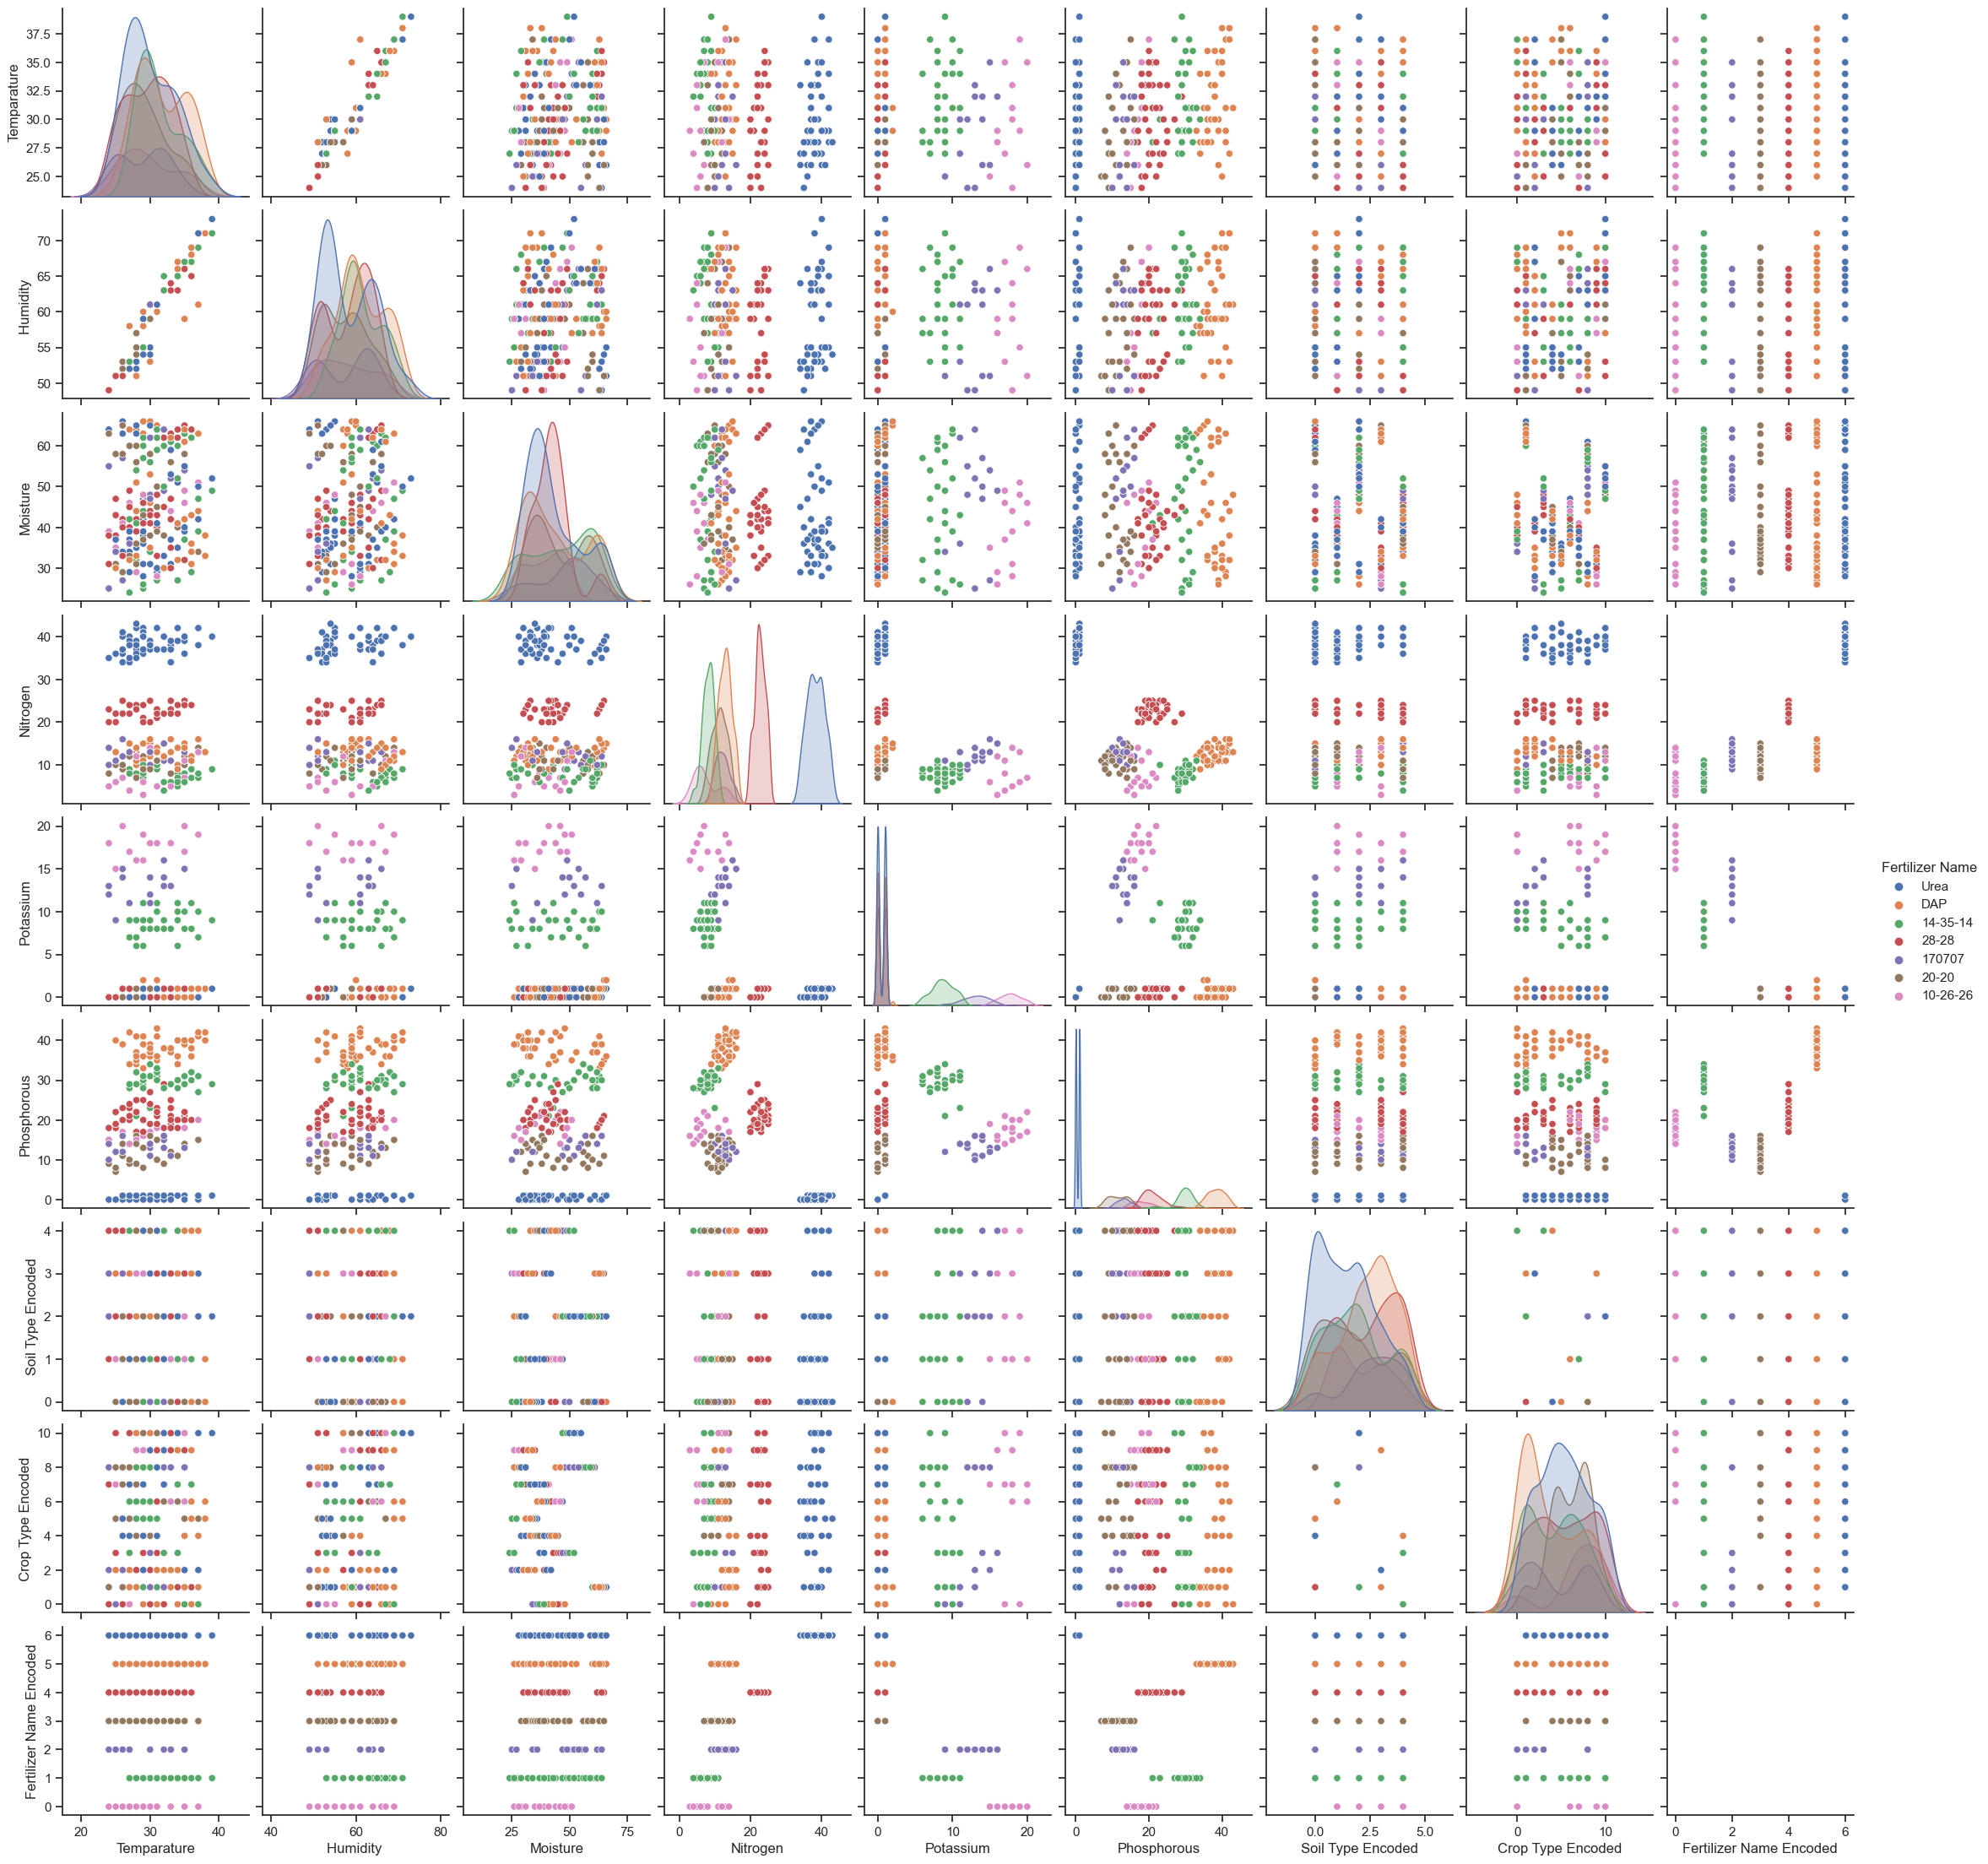

In [53]:
import seaborn as sns

# Assuming you have a DataFrame named 'dataset' with multiple dimensions
# Replace 'dataset' with your actual DataFrame

sns.set(style="ticks")
sns.pairplot(dataset, hue="Fertilizer Name")
